***TEAM MEMBERS***:
- `ASHISH BISHT`, MDS202313
- `VISHAL MAURYA`, MDS202354

### Libraries used

In [1]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import time

### Data Representation

In [2]:
def tuple_of_tuple(file_name):
    with open(file_name) as f:
        text = f.read()
    sentence = text.split("\n")
    l = [[]]
    a = 1
    
    for i in range(3,len(sentence)-1):
        if a == int(sentence[i].split()[0]):
            l[a-1].append(int(sentence[i].split()[1]))
        else:
            a = int(sentence[i].split()[0])
            l = l + [[int(sentence[i].split()[1])]]

    for i in range(len(l)):
        l[i] = tuple(l[i])
        
    return tuple(l)

## Implementing  algorithm from scratch

In [3]:
def create_initial_centroids(points_list,k_clusters):
    k_random_numbers = random.sample(range(0, len(points_list)), k_clusters)
    return [points_list[i] for i in k_random_numbers]

In [4]:
def jaccard_similarity(point1, point2):
    intersection = len(set(point1).intersection(set(point2)))
    union = len(set(point1).union(set(point2)))
    return intersection / union if union != 0 else 0

In [5]:
def assign_labels(points_list, centroids_list, k_clusters):
    label_list = []
    for point in points_list:
        max_similarity = 0
        nearest_label = None
        for label in range(k_clusters):
            similarity = jaccard_similarity(point, centroids_list[label])
            if similarity >= max_similarity:
                max_similarity = similarity
                nearest_label = label
        label_list.append(nearest_label)
    return label_list

In [6]:
def values_count(A):
    B = {}
    for i in A:
        if i in B.keys():
            B[i] += 1
        else:
            B[i] = 1
    return B

In [7]:
def label_wise_word_frequency(points_list, label_list, k_clusters):
    frequencies = {}
    for label in range(k_clusters):
        frequencies[label] = {}
    for i in range(len(points_list)):
        for word in points_list[i]:
            if word in frequencies[label_list[i]].keys():
                frequencies[label_list[i]][word] += 1
            else:
                frequencies[label_list[i]][word] = 1  
    return frequencies

In [8]:
def adjust_centroids(points_list,label_list, threshold, k_clusters):
    frequencies = label_wise_word_frequency(points_list, label_list, k_clusters)
    adjusted_centroids = []
    for label in range(k_clusters):
        threshold_fre = values_count(label_list)[label]*threshold
        adjusted_centroid = []
        for word in frequencies[label].keys():
             if frequencies[label][word] > threshold_fre:
                adjusted_centroid.append(word)
        adjusted_centroids.append(adjusted_centroid)
    for label in range(k_clusters):
        if len(adjusted_centroids[label]) == 0:
            label_index =[]
            for i in range(len(points_list)):
                if label_list[i] == label:
                    label_index.append(i)
            random_index = random.choice(label_index)
            adjusted_centroids[label] = points_list[random_index]
    return adjusted_centroids   

In [9]:
def average_similarity(points_list, label_list, centroids_list, k_clusters):
    total_similarities = []
    for label in range(k_clusters):
        for i in range(len(points_list)):
            if label_list[i] == label:
                total_similarities.append(jaccard_similarity(centroids_list[label],points_list[i]))
    return np.mean(total_similarities)

In [89]:
def KMeansClustering(points_list, k_clusters = 4, alpha = 0.01, threshold = 0.2, n_init= 4):
    best_similarity = 0
    for i in range(n_init):
#         print(i)
        epochs = 0
        current_centroids = create_initial_centroids(points_list, k_clusters)
        current_similarity = -1
        previous_similarity = -2

        while current_similarity - previous_similarity > alpha:
            previous_similarity = current_similarity
            label_list = assign_labels(points_list, current_centroids, k_clusters)
            current_centroids = adjust_centroids(points_list, label_list, threshold,k_clusters)
            current_similarity = average_similarity(points_list, label_list, current_centroids, k_clusters)
#             print(current_similarity)
            epochs +=1
            
        if current_similarity > best_similarity:
            best_similarity = current_similarity
            output = {"label_list":label_list,"centroids_list":current_centroids, "similarity_score":current_similarity,"epochs":epochs}    
    return output

## For model selection

In [90]:
def show_history_and_plot(text, list_of_kvalues, list_of_thresholds):
    history = []
    for k_clusters in list_of_kvalues:
        for threshold in list_of_thresholds:
            start = time.time()
            n_init = 4
            model = KMeansClustering(text, k_clusters = k_clusters, threshold = threshold, n_init = n_init)
            history.append([k_clusters,threshold,model["similarity_score"]])
            print("k_clusters:",k_clusters,"threshold:",threshold, "similarity:",round(model["similarity_score"],6),"n_init:",n_init,"epochs:",model["epochs"], "time:", round(time.time()-start,1),"sec")
        
    data_dict = {}
    for item in history:
        k_clusters, threshold, similarity = item
        if threshold not in data_dict:
            data_dict[threshold] = {'k_clusters': [], 'similarity': []}
        data_dict[threshold]['k_clusters'].append(k_clusters)
        data_dict[threshold]['similarity'].append(similarity)

    for threshold, data in data_dict.items():
        plt.plot(data['k_clusters'], data['similarity'], label=f"threshold = {threshold}")

    plt.xlabel('k_clusters')
    plt.ylabel('Similarity')
    plt.title('Average Similarity vs k for different Threshold')
    plt.legend()
    plt.show()

# Text Collection 1 : enron


k_clusters: 2 threshold: 0.06 similarity: 0.06143 epochs: 2 time taken: 17.5 sec
k_clusters: 2 threshold: 0.07 similarity: 0.060959 epochs: 2 time taken: 15.1 sec
k_clusters: 2 threshold: 0.08 similarity: 0.059008 epochs: 2 time taken: 11.6 sec
k_clusters: 2 threshold: 0.09 similarity: 0.054939 epochs: 2 time taken: 11.5 sec
k_clusters: 2 threshold: 0.1 similarity: 0.054755 epochs: 2 time taken: 12.0 sec
k_clusters: 2 threshold: 0.11 similarity: 0.050054 epochs: 2 time taken: 24.2 sec
k_clusters: 2 threshold: 0.12 similarity: 0.043917 epochs: 2 time taken: 11.3 sec
k_clusters: 3 threshold: 0.06 similarity: 0.06399 epochs: 2 time taken: 18.8 sec
k_clusters: 3 threshold: 0.07 similarity: 0.063063 epochs: 2 time taken: 16.3 sec
k_clusters: 3 threshold: 0.08 similarity: 0.067614 epochs: 2 time taken: 15.5 sec
k_clusters: 3 threshold: 0.09 similarity: 0.059258 epochs: 2 time taken: 15.4 sec
k_clusters: 3 threshold: 0.1 similarity: 0.05569 epochs: 2 time taken: 14.2 sec
k_clusters: 3 thresho

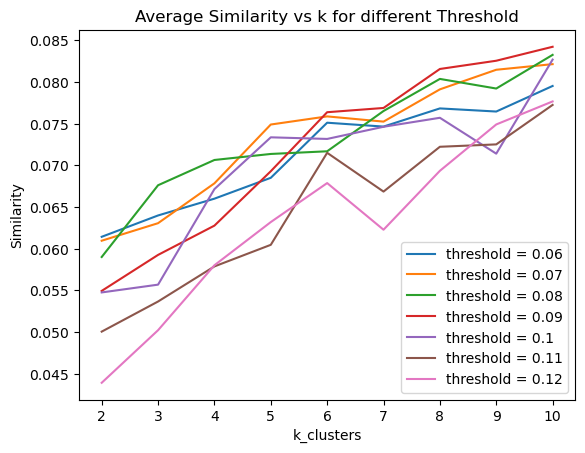

In [72]:
enron = tuple_of_tuple("docword.enron.txt")
list_of_kvalues = [2,3,4,5,6,7,8,9,10]
list_of_thresholds = [0.06,0.07,0.08,0.09,0.1,0.11,0.12]
show_history_and_plot(enron, list_of_kvalues, list_of_thresholds)

We can observe that optimum number of cluster is 6 with frequency threshold 0.09 respectively.

# Text Collection 2 : nips

k_clusters: 2 threshold: 0.16 similarity: 0.239652464697714 epochs: 2 time taken: 2.7570877075195312 sec
k_clusters: 2 threshold: 0.17 similarity: 0.23984309268411463 epochs: 2 time taken: 2.6560072898864746 sec
k_clusters: 2 threshold: 0.18 similarity: 0.24486264651295853 epochs: 2 time taken: 2.530122995376587 sec
k_clusters: 2 threshold: 0.19 similarity: 0.24570051640191581 epochs: 2 time taken: 2.5034873485565186 sec
k_clusters: 2 threshold: 0.2 similarity: 0.24598910528214993 epochs: 2 time taken: 2.4660768508911133 sec
k_clusters: 2 threshold: 0.21 similarity: 0.24349903135511575 epochs: 2 time taken: 2.5211219787597656 sec
k_clusters: 2 threshold: 0.22 similarity: 0.24034280263472418 epochs: 2 time taken: 2.4974863529205322 sec
k_clusters: 3 threshold: 0.16 similarity: 0.24451177106273347 epochs: 2 time taken: 3.512277603149414 sec
k_clusters: 3 threshold: 0.17 similarity: 0.2453423044880185 epochs: 2 time taken: 3.38211727142334 sec
k_clusters: 3 threshold: 0.18 similarity: 0.2

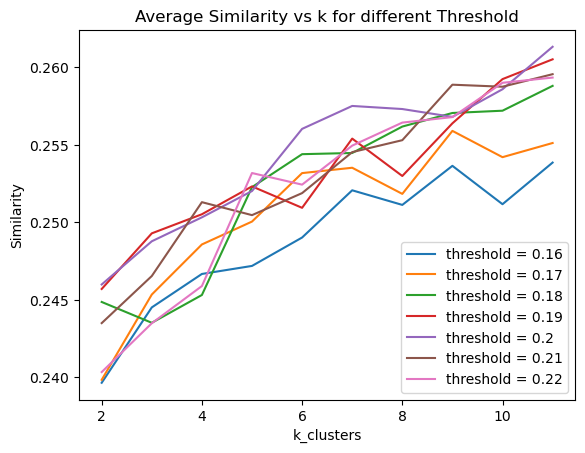

In [44]:
nips = tuple_of_tuple("docword.nips.txt")
list_of_kvalues = [2,3,4,5,6,7,8,9,10,11]
list_of_thresholds = [0.16,0.17,0.18,0.19,0.20,0.21,0.22]
show_history_and_plot(nips, list_of_kvalues, list_of_thresholds)

We can observe that optimum number of cluster is 7 with frequency threshold 0.2.

# Text Collection 3 : kos

k_clusters: 2 threshold: 0.08 similarity: 0.119836 n_init: 4 epochs: 3 time: 6.3 sec
k_clusters: 2 threshold: 0.1 similarity: 0.119069 n_init: 4 epochs: 2 time: 5.5 sec
k_clusters: 2 threshold: 0.11 similarity: 0.121158 n_init: 4 epochs: 3 time: 5.9 sec
k_clusters: 2 threshold: 0.12 similarity: 0.122595 n_init: 4 epochs: 3 time: 5.7 sec
k_clusters: 2 threshold: 0.14 similarity: 0.119623 n_init: 4 epochs: 4 time: 5.4 sec
k_clusters: 2 threshold: 0.16 similarity: 0.118889 n_init: 4 epochs: 3 time: 4.1 sec
k_clusters: 3 threshold: 0.08 similarity: 0.128441 n_init: 4 epochs: 3 time: 10.0 sec
k_clusters: 3 threshold: 0.1 similarity: 0.132124 n_init: 4 epochs: 3 time: 9.6 sec
k_clusters: 3 threshold: 0.11 similarity: 0.131463 n_init: 4 epochs: 3 time: 7.5 sec
k_clusters: 3 threshold: 0.12 similarity: 0.132018 n_init: 4 epochs: 3 time: 8.1 sec
k_clusters: 3 threshold: 0.14 similarity: 0.129718 n_init: 4 epochs: 2 time: 7.2 sec
k_clusters: 3 threshold: 0.16 similarity: 0.127468 n_init: 4 epoch

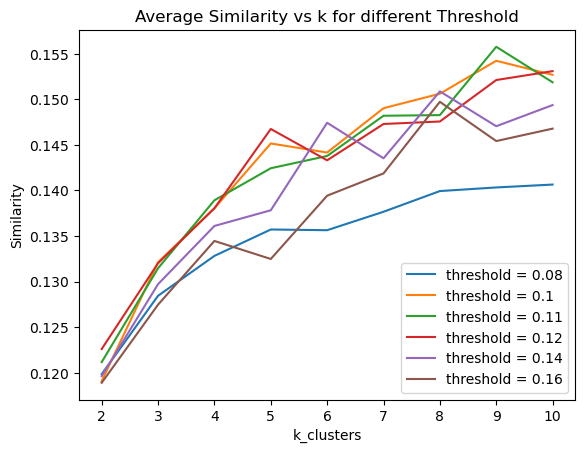

In [93]:
kos = tuple_of_tuple("docword.kos.txt")
list_of_kvalues = [2,3,4,5,6,7,8,9,10]
list_of_thresholds = [0.08,0.10,0.11,0.12,0.14,0.16]
show_history_and_plot(kos, list_of_kvalues, list_of_thresholds)

We can observe that optimum number of cluster is 3 with frequency threshold 0.12.